## CatClassification
회사에서 열렸던 고양이 분류 강좌 실습 내용기반의 내용으로 작성되었습니다.
<br>설명은 제가 복습을 위해 임의로 단 것입니다.
<br>고양이 사진마다 "품종"에 대한 label을 달아 학습 시킨 후,
<br>어떤 고양이 이미지를 넣었을 때, 그 이미지 속 고양이의 품종을 맞추는 것을 목표로 합니다.
<br>학습 방식은 supervised learning입니다.
<br>먼저 필요한 라이브러리를 설치하고, import 합니다.

In [ ]:
!pip install torch
!pip install torchvision
!pip install --no-cache-dir -I pillow

In [3]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## preparation training and validation data

http://www.robots.ox.ac.uk/~vgg/data/pets/   
이미지는 위 링크에서 다운로드 가능하고, 압축을 풀어 images/ 폴더에 넣어줍니다.  
기본적으로 "품종_번호.jpg"와 형식의 파일명을 갖고 있습니다.  
아래 코드 실행 시 고양이 이미지가 잘 나오면 됩니다.  
숫자를 변경해보면서 다른 이미지도 잘 불러와 지는지 확인하면 좋습니다.

In [ ]:
# Image.open("images/Abyssinian_5.jpg")

본격적인 학습을 위해, 먼저 이미지 파일명에 적혀있는 "품종"이름을 기준으로 데이터를 구분해놓습니다.  

<p>
아래 코드가 실행 되면,  
<br>data  
<br>ㄴTRAIN
<br>&nbsp;&nbsp;&nbsp;&nbsp;ㄴAbyssinian  
<br>&nbsp;&nbsp;&nbsp;&nbsp;ㄴamerican_bulldog  
<br>&nbsp;&nbsp;&nbsp;&nbsp;....  
<br>ㄴVAL  
<br>&nbsp;&nbsp;&nbsp;&nbsp;ㄴAbyssinian  
<br>&nbsp;&nbsp;&nbsp;&nbsp;ㄴamerican_bulldog  
<br>&nbsp;&nbsp;&nbsp;&nbsp;....  
<br>이런 형태의 품종별 폴더 구조로 이미지가 분류됩니다.  

이중 sklearn.model_selection.train_test_split함수는 데이터를 training용, validation용으로 분류해주는 함수입니다.  
여러 개의 배열을 매개변수로 넣고, stratify를 정해주면, 
stratify에 지정된 배열의 인덱스를 기준으로 training/validation을 분류해주고, 
나눠진 결과물을 t/v/t/v 순으로 리턴해줍니다.  
<br>
아래 코드에서는 이미지 경로와 레이블을 넣었으므로,  
train_x에는 training용으로 설정된 이미지의 경로  
val_x에는 validation용으로 설정된 이미지의 경로  
train_y에는 training용으로 설정된 이미지의 라벨  
val_y에는 validation용으로 설정된 이미지의 라벨  
이 각각 채워지게 됩니다.
    
</p>
</details>

In [5]:
import os
import shutil
import glob
import re

import pandas as pd
from sklearn.model_selection import train_test_split


# helper function for dataset preparation
def extract_label(img_path):
  """
  Extract label from "image path"
  
  arguments:
  img_path (string): ex)"images/Egyptian_Mau_63.jpg"
  
  return:
  label (string): ex)Egyption_Mau
  """
  label = re.search(r'images\\(.*)(_(.+).jpg)', img_path).group(1)
  return label


# helper function for dataset preparation
def copy_files(x, y, dataset_dir, category):
  print(">> copying files to {}".format(category))
  for image_path, label in zip(x, y):
    
    # if label directory not exist then make it.
    new_img_dir = os.path.join(dataset_dir, category, label)
    if not os.path.exists(new_img_dir):
      os.makedirs(new_img_dir)
    
    # copy image
    new_image_path = os.path.join(new_img_dir, os.path.basename(image_path))
    shutil.copy(image_path, new_image_path)
  
  print(">> {} dataset created.".format(category))

  
RAW_DATA_DIR = 'images'
def prepare_images(raw_data_dir):
  print(">> preparing image data..")
  
  # 이미지 파일을 찾아서 레이블 값을 추출합니다.
  image_paths = glob.glob("{}/*.jpg".format(raw_data_dir))
  image_df = pd.DataFrame(image_paths)
  image_df.columns = ['img_path']
  image_df['label'] = image_df.img_path.map(extract_label)

  # 데이터셋을 트레이닝 데이터와 밸리데이션 데이터로 나눕니다. (이미지 경로, 레이블)
  print(">> spliting training / validation dataset")
  train_x, val_x, train_y, val_y = train_test_split(
      image_df.img_path, image_df.label, # 분리할 이미지 경로와 레이블
      stratify=image_df.label, # 레이블을 기준으로 분할
      random_state=42, # 랜덤 시드
      test_size=0.1 # 밸리데이션 데이터 비율
  )
  """
  train_x에는 training용으로 설정된 이미지의 경로  
  val_x에는 validation용으로 설정된 이미지의 경로  
  train_y에는 training용으로 설정된 이미지의 라벨  
  val_y에는 validation용으로 설정된 이미지의 라벨
  """   
  
  # 데이터셋 폴더를 만듭니다.
  if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)
    
  # 트레이닝 데이터셋을 만듭니다.
  copy_files(train_x, train_y, DATASET_DIR, 'TRAIN')
  
  # 벨리데이션 데이터셋을 만듭니다.
  copy_files(val_x, val_y, DATASET_DIR, 'VAL')
  
  print(">> job done.")
  

DATASET_DIR = "data"
if not os.path.exists(DATASET_DIR):
  print("preparing image data")
  prepare_images(RAW_DATA_DIR)
else:
  print("image data are already prepared")

image data are already prepared


## 데이터셋 만들기
아래 코드는 이미지 파일을 불러오고, 이미지를 pytorch에서 사용할 데이터 형태로 만드는 과정입니다.
<br>여기서 [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]는 Imagenet에서 수많은 이미지들의 평균 값과 표준편차 값을 미리 구해놓을 수치라고 합니다.

ImageFolder클래스에 폴더를 집어 넣으면, raw이미지를 읽어서 데이터셋을 만들어 주는데,
<br>이 때, 폴더명이 classname(Supervised Learning에서 Label)이 됩니다.

In [6]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as vdatasets


def create_dataset(dataset_dir):
  
  # raw image를 가공하여 모델에 넣을 수 있는 인풋으로 변환합니다.
  data_transforms = {
      'TRAIN': transforms.Compose([
          transforms.Resize((224, 224)), # 1. 사이즈를 224, 224로 통일.
          transforms.RandomHorizontalFlip(), # 좌우반전으로 데이터셋 2배 뻥튀기
          transforms.ToTensor(), # 2. PIL이미지를 숫자 텐서로 변환.
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #3. 노멀라이즈
      ]),
      'VAL': transforms.Compose([
          transforms.Resize((224, 224)),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ])
  }
  
  # 이미지 데이터셋의 형태로 트레이닝과 밸리데이션 데이터셋을 준비합니다.
  # 이 ImageFolder클래스에 폴더를 집어 넣으면, raw이미지를 읽어서 데이터셋을 만들어 주는데, 
  # 이 때, 폴더명이 classname(Supervised Learning에서 Label)이 됩니다.
  image_datasets = {x: vdatasets.ImageFolder(os.path.join(dataset_dir, x), data_transforms[x])
                      for x in ['TRAIN', 'VAL']}
    
  nb_classes = len(image_datasets['TRAIN'].classes)
  
  return image_datasets, nb_classes

image_datasets, nb_classes = create_dataset(DATASET_DIR)


In [45]:
# 아래 코드를 실행해보면, 이미지 경로와 label이 하나의 데이터 튜플로 되어있음을 알 수 있습니다.
# image_datasets['TRAIN'].imgs

In [7]:
def create_dataloaders(image_datasets, training_batch_size, validation_batch_size, isShuffle):
  dataloaders = {'TRAIN': torch.utils.data.DataLoader(image_datasets['TRAIN'], batch_size=training_batch_size, shuffle=isShuffle),
                 'VAL': torch.utils.data.DataLoader(image_datasets['VAL'], batch_size=validation_batch_size, shuffle=isShuffle)
                }
  return dataloaders

dataloaders = create_dataloaders(image_datasets, 32, 32, True)

In [ ]:
image_datasets['TRAIN'].classes

In [11]:
# 데이터로더가 한번에 밀어내는 이미지와 레이블 배치를 살펴봅시다.
inputs, targets = next(iter(dataloaders['TRAIN']))

In [ ]:
# 32, 3, 224, 224 크기의 텐서가 출력됩니다.
# 이 숫자들은 왼쪽부터 미니배치 크기, 이미지 채널 수 (RGB), 이미지 높이, 너비를 의미합니다.
print(inputs)

In [41]:
# targets에는 32개 이미지들의 라벨이 들어있습니다. supervised learning에서 "정답"에 해당합니다.
targets

tensor([ 1, 16,  1, 20,  0, 11, 16, 28,  0, 22, 11, 17, 29, 24,  0, 18, 20, 16,
        29,  2, 16, 15,  1, 14, 16, 33, 25, 36,  8,  3, 16, 19])

In [ ]:
# 이미지 데이터셋에는 `class_to_idx`를 통해 실제 레이블-숫자 맵핑 정보를 얻을 수 있죠.
image_datasets['TRAIN'].class_to_idx

In [16]:
# 숫자를 넣으면 그에 대응되는 레이블을 출력하는 딕셔너리를 만들어봅시다.
int2label = {v: k for k, v in image_datasets['TRAIN'].class_to_idx.items()}

int2label[9]

'Russian_Blue'

## loss function 정의하기

In [5]:
import torch.optim as optim

def prepare_loss_function_and_optimizer(lr, model):
  loss_function = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)
  
  return loss_function, optimizer

# loss_function, optimizer = prepare_loss_function_and_optimizer(0.001, model)

## train / evaluate 함수 정의하기

In [6]:
import torch.nn.functional as F

def train(model, optimizer, loss_function, data_iterator, epoch):
  
  print("training epoch {}".format(epoch))
  # model을 학습 모드로 바꿔줍니다.
  model.train()
  
  nb_corrects = 0
  nb_data = 0
  loss_list = []
  
  for ix, (inputs, targets) in enumerate(data_iterator):
    inputs = inputs.to(DEVICE)
    targets = targets.to(DEVICE)
    
    # 모델에 inputs를 넣어 출력값 outputs를 얻습니다.
    outputs = model(inputs)
    
    # 출력값과 실제값의 오차를 계산합니다.
    loss = loss_function(outputs, targets)
    loss_list.append(loss.item())
    
    # 실제 맞춘 갯수와 전체 갯수를 업데이트합니다.
    nb_corrects += (outputs.argmax(1) == targets).sum().item()
    nb_data += len(targets)
    
    # optimizer를 먼저 깔끔하게 초기화합니다.
    optimizer.zero_grad()
    
    # loss를 역전파합니다.
    loss.backward()
    
    # optimizer를 사용해 모델의 파라미터를 업데이트합니다.
    optimizer.step()
    
    if ix % 100 == 0:
      print(">> [{}] | loss: {:.4f}".format(ix, loss))
    
  epoch_accuracy = nb_corrects / nb_data
  epoch_avg_loss = torch.tensor(loss_list).mean().item()
  
  print("[training {:03d}] avg_loss: {:.4f} | accuracy: {:.4f}".format(epoch, epoch_avg_loss, epoch_accuracy))
    
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CNNModel(nb_classes).to(DEVICE)    

# train(model, optimizer, loss_function, dataloaders['TRAIN'], 0)
  

In [7]:
def evaluate(model, loss_function, data_iterator, epoch):
  
  print("evaluation epoch {}".format(epoch))
  model.eval()
  
  nb_corrects = 0
  nb_data = 0
  loss_list = []
  
  for inputs, targets in data_iterator:
    
    with torch.no_grad():
      inputs = inputs.to(DEVICE)
      targets = targets.to(DEVICE)

      # 모델에 inputs를 넣어 출력값 outputs를 얻습니다.
      outputs = model(inputs)

      # 출력값과 실제값의 오차를 계산합니다.
      loss = loss_function(outputs, targets)
      loss_list.append(loss.item())

      # 실제 맞춘 갯수와 전체 갯수를 업데이트합니다.
      nb_corrects += (outputs.argmax(1) == targets).sum().item()
      nb_data += len(targets)
    
  epoch_accuracy = nb_corrects / nb_data
  epoch_avg_loss = torch.tensor(loss_list).mean().item()
  
  print("[validation {:03d}] avg_loss: {:.4f} | accuracy: {:.4f}".format(epoch, epoch_avg_loss, epoch_accuracy))
    
# evaluate(model, loss_function, dataloaders['VAL'], 0)

In [8]:
def run_all(image_datasets, model, lr, num_epochs):
  dataloaders = create_dataloaders(image_datasets, 32, 32, True)
  
  # loss_function과 optimizer를 준비합니다.
  loss_function, optimizer = prepare_loss_function_and_optimizer(lr, model)
  
  for epoch in range(num_epochs):
    # 트레이닝
    train(model, optimizer, loss_function, dataloaders['TRAIN'], epoch)
    # 밸리데이션
    evaluate(model, loss_function, dataloaders['VAL'], epoch)
    
  return model

In [ ]:
# 이런식으로 모델만 생성한 후 함수를 실행하면 됩니다.
#DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = CNNModel(nb_classes).to(DEVICE)
#model = run_all(image_datasets, model, 0.0001, 3)

## CNN 모델 구성해보기

- Object Classification을 수행하는 CNN 모델은 Feature Extraction과 Classification 파트로 구성됩니다.
- Feature Extraction은 간단히 CONV-RELU-POOL을 여러번 반복해서 구현할 수 있습니다.
- Classification은 Feature Extraction의 결과를 37개의 레이블에 연결하는 과정을 거치며 다음과 같은 두가지 방법이 주로 쓰입니다..
  - 1) flatten - fully connected layer - softmax
  - 2) global average pooling - fully connected layer - softmax
  
  아래에서는 1번 옵션을 사용해서 CNN 모델을 만들어보겠습니다.

In [ ]:
import torch.nn as nn

# PyTorch에서 쓰는 여러 방법 중 하나로,
# 클래스로 모델을 만들어봅시다.
class CNNModel(nn.Module):
  
  # 여기서 레이어를 정의합니다.
  # 보통 학습가능한 파라미터가 들어가는 레이어를 여기서 먼저 정의해주고,
  # 아래 `forward`에서 가져다 씁니다.
  def __init__(self, nb_classes):
    super(CNNModel, self).__init__()
    
    # conv 레이어를 하나 둡니다. 7x7 필터를 2픽셀씩 건너뛰면서 필터링을 합니다.
    self.conv1 = nn.Conv2d(in_channels = 3, 
                           out_channels = 16, 
                           kernel_size = 7, 
                           stride = 2)
    
    # pool 레이어를 하나 둡니다. conv를 거친 결과를 2x2커널로 2픽셀씩 건너뛰면서 최댓값만 취합니다.
    # 이로서 이미지의 가로세로가 절반으로 줄어듭니다.
    self.pool1 = nn.MaxPool2d(kernel_size=2,
                              stride=2)
    
    # pool 레이어의 출력물에 ReLU 액티베이션을 넣어줍니다. 음수는 모두 0이 됩니다.
    self.relu1 = nn.ReLU()
    
    # conv1->pool1->relu1을 한번 더 반복합니다.
    self.conv2 = nn.Conv2d(in_channels = 16, 
                           out_channels = 32, 
                           kernel_size = 3, 
                           stride = 1)
    self.pool2 = nn.MaxPool2d(kernel_size=2,
                              stride=2)
    self.relu2 = nn.ReLU()
    
    # 같은 층을 한번 더 반복합니다.
    self.conv3 = nn.Conv2d(in_channels = 32, 
                           out_channels = 64, 
                           kernel_size = 3, 
                           stride = 1)
    self.pool3 = nn.MaxPool2d(kernel_size=2,
                              stride=2)
    self.relu3 = nn.ReLU()
    
    # 같은 층을 한번 더 반복합니다.
    self.conv4 = nn.Conv2d(in_channels = 64, 
                           out_channels = 128, 
                           kernel_size = 3, 
                           stride = 1)
    self.pool4 = nn.MaxPool2d(kernel_size=2,
                              stride=2)
    self.relu4 = nn.ReLU()
    
    
    # conv 레이어의 출력물을 fully connected 레이어에 넣어 분류하기 위해서는
    # flatten 과정을 거쳐야 합니다.
    # conv 레이어의 출력물은 [32, 128, 5, 5]로,
    # 이를 [32, 128*5*5], 즉 [32, 3200]로 변환합니다.
    # 즉, 하나의 이미지는 3200개의 숫자로 변환되며, 이를
    # 아래 2개의 fully connected layer에 통과시킵니다.
    
    self.fc1 = nn.Linear(in_features = 3200, 
                         out_features = 512)
    self.relu_fc1 = nn.ReLU()
    
    # 마지막으로 4096개의 숫자를 우리가 가진 클래스만큼의 숫자로 변환해줍니다.
    self.fc2 = nn.Linear(512, nb_classes)
    
    
  # forward propagation  
  def forward(self, inputs):
    
    # 1st conv sequence
    x = self.conv1(inputs)
    x = self.relu1(x)
    x = self.pool1(x)
    
    # 2nd conv sequence
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool2(x)
    
    # 3rd conv sequence
    x = self.conv3(x)
    x = self.relu3(x)
    x = self.pool3(x)
    
    # 4th conv sequence
    x = self.conv4(x)
    x = self.relu4(x)
    x = self.pool4(x)
    
    # flatten
    minibatch_size = inputs.size(0)
    flattened_x = x.view(minibatch_size, -1)
    
    # 1st fc sequence
    x = self.fc1(flattened_x)
    x = self.relu_fc1(x)
    
    # 2nd fc sequence
    x = self.fc2(x)
    
    return x
    
model = CNNModel(nb_classes)


# sample_run
inputs, targets = next(iter(dataloaders['TRAIN']))

outputs = model(inputs)

print(outputs.size())  

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(nb_classes).to(DEVICE)
model = run_all(image_datasets, model, 0.0001, 3)

## Transfer Learning해보기
Transfer Learning은 이미 검증된 성능과 학습된 가중치를 가진 분류 모델을 이용해서 학습하면, 통상적으로 다른 분야의 분류에서도 금방 좋은 성능을 찾아간다는 개념의 학습 방법입니다. 여기서는 resnet50을 이용해서 학습을 해보겠습니다.

In [9]:
import torchvision.models as vmodels
import copy
import torch.nn as nn

base_resnet = vmodels.resnet50(pretrained=True)

In [10]:
from collections import OrderedDict

class Resnet_fc(nn.Module):
    def __init__(self, base_model, nb_classes, toFreeze=False):
        super(Resnet_fc, self).__init__()
        
        base_model_copy = copy.deepcopy(base_model)
        self.feature_extractor = nn.Sequential(*list(base_model_copy.children())[:-2])
        
        if toFreeze:
          for param in self.feature_extractor.parameters():
            param.requires_grad=False
        else:
          for param in self.feature_extractor.parameters():
            param.requires_grad=True
          
        
        self.gap = nn.AvgPool2d(7, 1)
        self.linear = nn.Linear(2048, nb_classes)

    def forward(self, inputs):
        x = self.feature_extractor(inputs)
        x = self.gap(x).squeeze(-1).squeeze(-1)
        x = self.linear(x)
        
        return x

In [12]:
#DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cpu")

frozen_tl_resnet = Resnet_fc(base_resnet, nb_classes, toFreeze=False).to(DEVICE)
frozen_tl_resnet = run_all(image_datasets, frozen_tl_resnet, 0.00001, 3)

training epoch 0
>> [0] | loss: 3.6487
>> [100] | loss: 2.6175
>> [200] | loss: 1.7974
[training 000] avg_loss: 2.6583 | accuracy: 0.5268
evaluation epoch 0
[validation 000] avg_loss: 1.4720 | accuracy: 0.8755
training epoch 1
>> [0] | loss: 1.5378
>> [100] | loss: 1.0923
>> [200] | loss: 0.7885
[training 001] avg_loss: 1.1399 | accuracy: 0.8818
evaluation epoch 1
[validation 001] avg_loss: 0.5978 | accuracy: 0.9120
training epoch 2
>> [0] | loss: 0.6909
>> [100] | loss: 0.5148
>> [200] | loss: 0.4873
[training 002] avg_loss: 0.5962 | accuracy: 0.9197
evaluation epoch 2
[validation 002] avg_loss: 0.3526 | accuracy: 0.9296


In [13]:
torch.save(frozen_tl_resnet.state_dict(), 'modelweights.pth')

In [ ]:
frozen_tl_resnet.state_dict((torch.load('modelweights.pth'))

이미지를 tensor로 변환하여 트레이닝해놓았으므로, 사용할 때도 입력 이미지를 tensor로 변환하는 작업이 필요합니다.
<br>image_datasets['TRAIN'].transform(img)가 이 일을 담당합니다.
<br>변환 후 모델에 넣고 판단결과를 outputs로 받습니다.
<br>이 outputs을 softmax에 넣으면, 각 라벨별 확률이 나옵니다.
<br>이 결과를 다시 torch.topk에 넣으면 제일 높은 확률 순서로 정렬된 (확률, 라벨) 쌍의 데이터가 나옵니다. 5를 넣으면 상위 5개가 나옵니다.

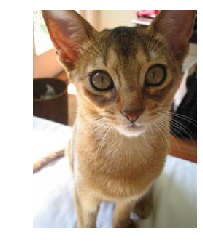

Prediction: Abyssinian (89.6%)
Prediction: Bengal (5.1%)
Prediction: Egyptian_Mau (1.0%)
Prediction: Sphynx (0.7%)
Prediction: chihuahua (0.4%)


In [33]:
from PIL import Image as pil_image

def inference(img_path, model):
  model.eval()
  img = pil_image.open(img_path)
  inputs = image_datasets['TRAIN'].transform(img).unsqueeze(0).to(DEVICE)
  
  outputs = model(inputs)

  probs, predicted_labels = torch.topk(F.softmax(outputs, dim=1)[0], 5)
  
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  for p, label in zip(probs, predicted_labels):
    print("Prediction: {} ({:.1f}%)".format(int2label[label.item()], p.item() * 100))
  
  
  
outputs = inference("images/Abyssinian_16.jpg", frozen_tl_resnet)

In [ ]:
#img = pil_image.open("Abyssinian_225.jpg")
#image_datasets['TRAIN'].transform(img).unsqueeze(0)

In [68]:
from skimage.transform import resize
import numpy as np


class _PropagationBase(object):
    def __init__(self, model, target_layer):
        super(_PropagationBase, self).__init__()
        self.device = next(model.parameters()).device
        self.model = model.eval()
        self.image = None
        self.target_layer = target_layer

    def _encode_one_hot(self, idx_list):
        one_hot = torch.zeros(self.preds.size())
        for i, idx in enumerate(idx_list):
            one_hot[i, idx] = 1.0

        return one_hot.to(self.device)

    def forward(self, image):
        self.model.zero_grad()
        self.preds = self.model(image)
        self.probs = F.softmax(self.preds, dim=1)
        return self.probs

    def backward(self, idx):
        one_hot = self._encode_one_hot(idx)
        self.preds.backward(gradient=one_hot, retain_graph=True)
        
class GradCAM(_PropagationBase):
    def __init__(self, model, target_layer):
        super(GradCAM, self).__init__(model, target_layer)
        self.fmap = None
        self.grad = None
        self.is_valid = False

        def func_f(module, input, output):
            self.fmap = output.detach()

        def func_b(module, grad_in, grad_out):
            self.grad = grad_out[0].detach()

        for module in self.model.named_modules():
            if module[0] == self.target_layer:
                self.is_valid = True
                module[1].register_forward_hook(func_f)
                module[1].register_backward_hook(func_b)

        if not self.is_valid:
            raise ValueError('Invalid layer name: {}'.format(target_layer))


    #def _compute_grad_weights(self, grads):
    #    grads = self._normalize(grads)
    #    return F.adaptive_avg_pool2d(grads, 1)

    def generate(self):
        
        normalized_grad = F.normalize(self.grad, p=2, dim=1, eps=1e-12)
        weight = F.adaptive_avg_pool2d(normalized_grad, 1)
        
        weighted_combination = (self.fmap * weight).sum(dim=1)
        relued = torch.clamp(weighted_combination, min=0.0)
        
        min_values = relued.min(2, keepdim=True)[0].min(1, keepdim=True)[0]
        max_values = relued.max(2, keepdim=True)[0].max(1, keepdim=True)[0]
        gcam = ((relued - min_values) / max_values).cpu().numpy()
        
        
        return gcam

이미지와 라벨을 파라미터로 주면, 해당 라벨이라고 판단하는데에 어떤 픽셀이 영향을 끼쳤는지를 알 수 있습니다.
<br>아래 예는 images/Abyssinian_11.jpg가 아비니시안이라고 판단하는데에 어떤 픽셀이 영향을 끼쳤는지를 나타냅니다. 붉은 색일수록 많은 영향을 끼친 것입니다.

C:\Users\admin\Anaconda3\envs\venv37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


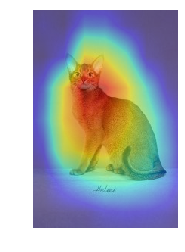

In [69]:
def run_gradcam(img_path, idx):
  gcam = GradCAM(frozen_tl_resnet, 'feature_extractor.7.2')
  img = pil_image.open(img_path)
  inputs = image_datasets['TRAIN'].transform(img).unsqueeze(0).to(DEVICE)
  inputs = torch.tensor(inputs, requires_grad=True)
  
  preds = gcam.forward(inputs)
  gcam.backward([idx])
  
  gradcams = gcam.generate()
  
  h, w, c = np.asarray(img).shape
  
  plt.imshow(img)
  plt.imshow(resize(gradcams[0], (h, w)), cmap='jet', alpha=0.5)
  plt.axis("off")
  plt.show()
  
img_path = "images/Abyssinian_11.jpg"
idx = 0  

run_gradcam(img_path, idx)